# Line fitting example

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from lin_regression import LinearRegression
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(x):
    return 2 + 1.2 * x

In [3]:
n = 7

In [4]:
X = np.arange(start=1, stop=n + 1).reshape(-1, 1)
y = f(X) + np.random.normal(loc=0, scale=0.5, size=X.shape)

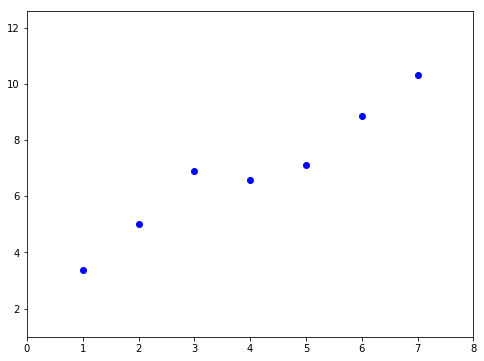

In [5]:
plt.figure(figsize=(8, 6))

plt.plot(X, y, 'bo')
plt.axis(
    xmin=0, xmax=n + 1,
    ymin=f(0) - 1, ymax=f(n + 1) + 1
)

plt.show()

In [6]:
lin_reg = LinearRegression()

In [7]:
lin_reg.fit(X, y)

In [8]:
print(lin_reg.coef_)

[[2.76462378]
 [1.0266005 ]]


In [9]:
X_line = np.arange(start=0, stop=n + 2).reshape(-1, 1)
y_line = lin_reg.predict(X_line)

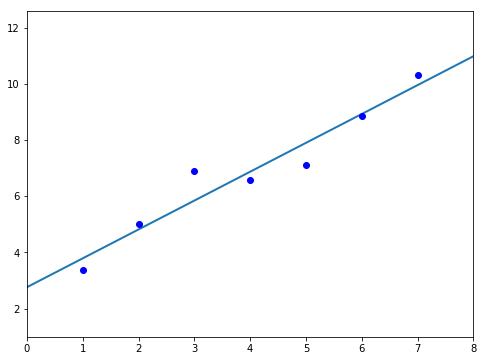

In [10]:
plt.figure(figsize=(8, 6))

plt.plot(X_line, y_line, linewidth=2.0)
plt.plot(X, y, 'bo')
plt.axis(
    xmin=0, xmax=n + 1,
    ymin=f(0) - 1, ymax=f(n + 1) + 1
)

plt.show()

### Cost function plot
$$J(w) = \sum_{i=1}^{n} (y^{(i)} - x^{(i)}w)^2$$

In [11]:
def squares_sum(w0, w1):
    return w0 ** 2 + w0 * w1 + w1 ** 2

In [12]:
w0, w1 = np.meshgrid(
    np.arange(-2, 2, 0.1),
    np.arange(-2, 2, 0.1)
)

In [13]:
J = squares_sum(w0, w1)

In [14]:
# normalization - to match colormap spectre
J = (J - J.min()) / (J.max() - J.min())

In [15]:
colors = cm.Spectral(J)
rcount, ccount, _ = colors.shape

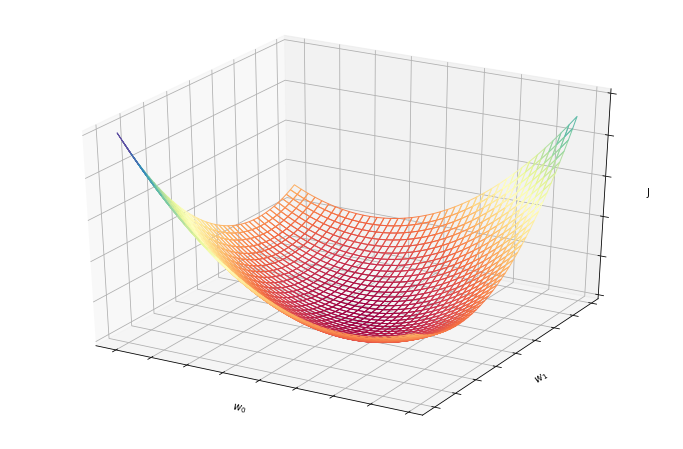

In [16]:
fig = plt.figure(figsize=(12, 8))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(w0, w1, J, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)
surf.set_facecolor((0, 0, 0, 0))

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('J')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()